## Environment Setup

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import data
path = r'/Users/Cel/Documents/Data Analytics/09-2023 Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## Visualizations from Exercise

### 01. Bar charts

<Axes: xlabel='orders_day_of_week'>

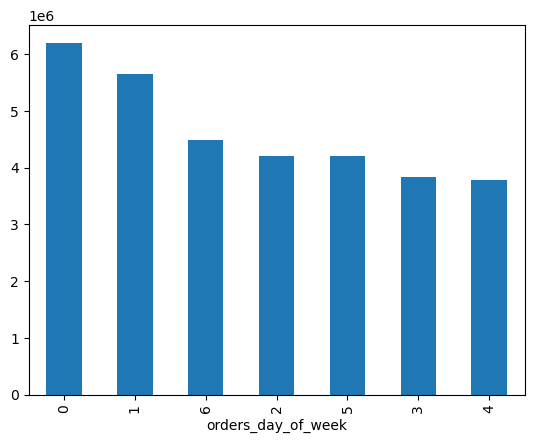

In [6]:
# Create bar chart - automatically sorts greatest to smallest value
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

Text(0.5, 1.0, 'Number of orders by day of week')

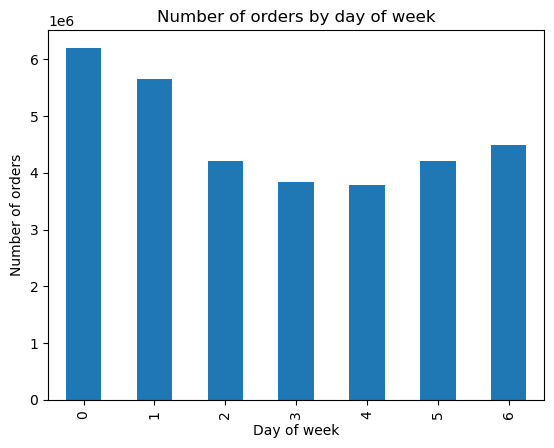

In [14]:
# Sort based on index order
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Day of week')
plt.ylabel('Number of orders')  
plt.title('Number of orders by day of week')

In [15]:
# Export image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 02. Histograms

Text(0.5, 1.0, 'Price Frequency')

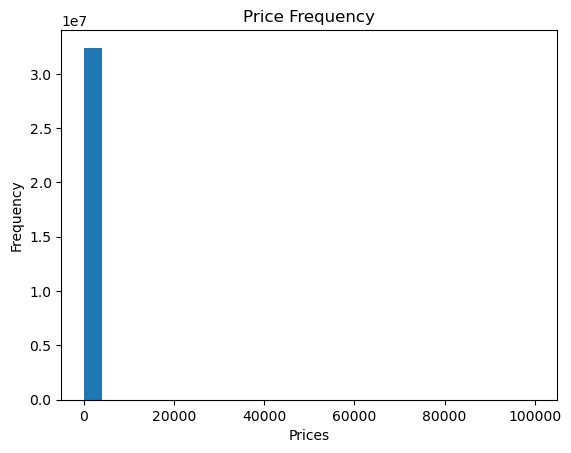

In [16]:
# Create histogram of 'prices' column
hist = ords_prods_merge['prices'].plot.hist(bins = 25)
plt.xlabel('Prices')
plt.ylabel('Frequency')  
plt.title('Price Frequency')

#### Scatterplots to explore possible outliers

<Axes: xlabel='prices', ylabel='prices'>

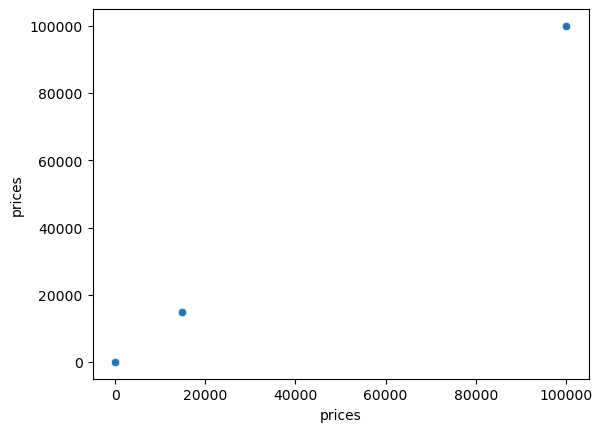

In [10]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [8]:
# Find products with prices > $100
ords_prods_merge['prices'].loc[ords_prods_merge['prices'] > 100]

7805        14900.0
7806        14900.0
15143       14900.0
20264       99999.0
20497       14900.0
             ...   
32303799    99999.0
32307882    99999.0
32310810    99999.0
32330048    99999.0
32330049    99999.0
Name: prices, Length: 5127, dtype: float64

In [9]:
# Convert these outliers to NaN values - nan is a numpy function that assigns missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [10]:
# Check if replacement was successful
ords_prods_merge['prices'].max()

25.0

Text(0.5, 1.0, 'Price Frequency')

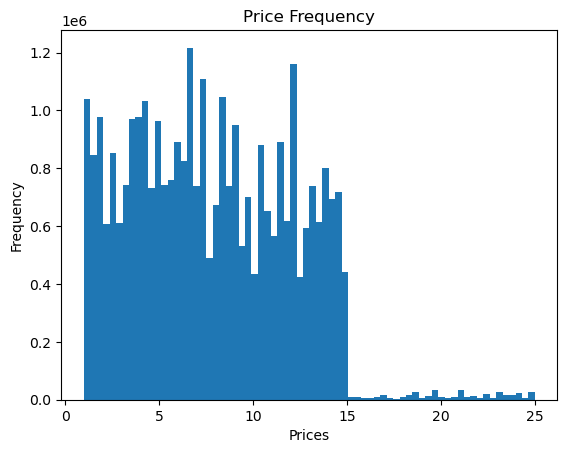

In [11]:
# Create histogram of 'prices' column
hist_prices = ords_prods_merge['prices'].plot.hist(bins = 70)
plt.xlabel('Prices')
plt.ylabel('Frequency')  
plt.title('Price Frequency')

In [13]:
# Export image file
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### 03. Line charts

#### Creating representative sample subset

In [25]:
# Create a 70/30 sample to make df smaller
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
# dev is simply an array listing whether values are bigger or smaller than .7 (T/F)
dev

array([False,  True, False, ...,  True,  True,  True])

In [27]:
# Split df into two samples - 70% in big
big = ords_prods_merge[dev]

In [28]:
# 30% in small (~ represents everything that's not in dev - everything that's not in 70% sample)
small = ords_prods_merge[~dev]

In [29]:
# Check row numbers
len(big) + len(small)

32404859

In [30]:
len(ords_prods_merge)

32404859

In [31]:
# Omit unnecessary columns
df_2 = small[['orders_day_of_week','prices']]

In [32]:
# Check result
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


#### Create line chart with sample data

Text(0.5, 1.0, 'Prices by Day of Week')

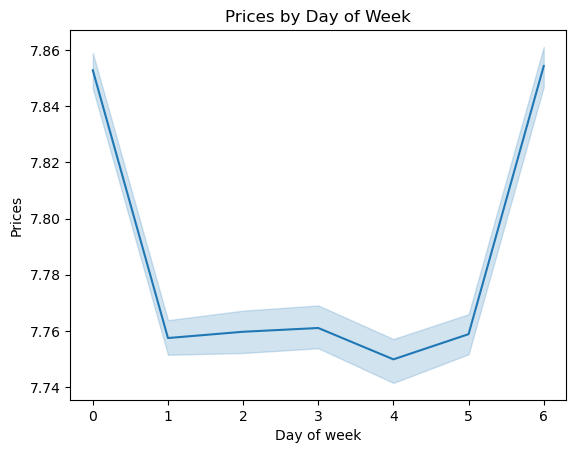

In [35]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
plt.xlabel('Day of week')
plt.ylabel('Prices')  
plt.title('Prices by Day of Week')

In [36]:
# Export image file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

## 'order_hour_of_day' Histogram

Text(0.5, 1.0, 'Ordering Frequency by Hour of the Day')

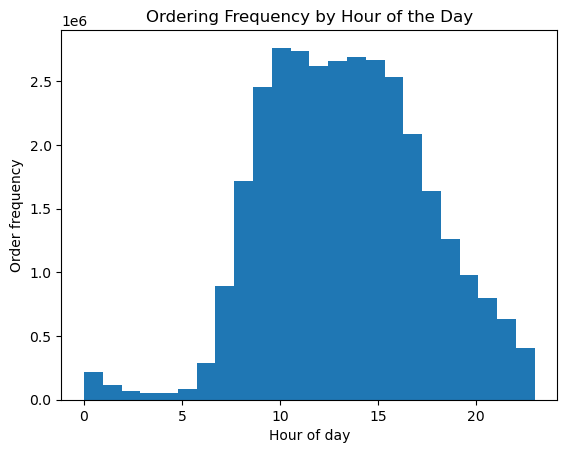

In [4]:
# Create histogram of 'order_hour_of_day' column
hist_order_hour_of_day = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel('Hour of day')
plt.ylabel('Order frequency')  
plt.title('Ordering Frequency by Hour of the Day')

This histogram demonstrates that peak ordering hours are between 10am-3pm. The ordering rate slowly tapers off after 3pm. The marketing team could consider more scheduling more ads after 5pm when there is less orders. 

In [5]:
# Export image file
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

## 'loyalty_flag' Bar Chart

Text(0.5, 1.0, 'Number of Customers in Loyalty Categories')

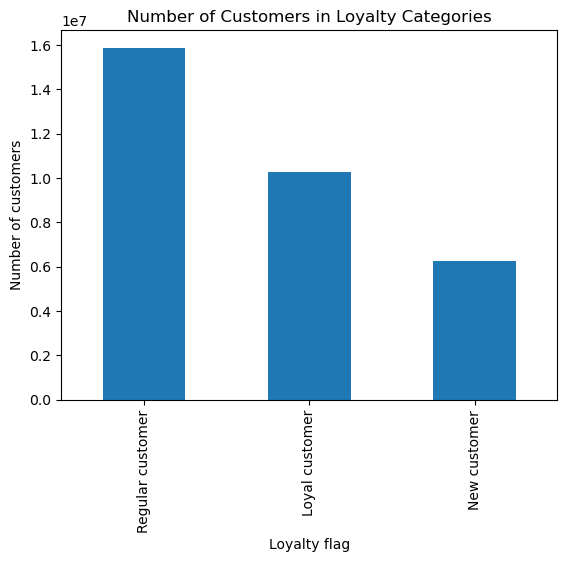

In [39]:
# Create bar chart using 'loyalty_flag' column
bar_loyalty = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()
plt.xlabel('Loyalty flag')
plt.ylabel('Number of customers')  
plt.title('Number of Customers in Loyalty Categories')

In [40]:
# Export image file
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

## 'prices' & 'order_hour_of_day' Line Chart

#### Create 70/30 sample data set

In [41]:
# Create a 70/30 sample
np.random.seed(4)
dev_2 = np.random.rand(len(ords_prods_merge)) <= 0.7

In [42]:
# Assign 70% of df to big
big_2 = ords_prods_merge[dev_2]

In [43]:
# Assign 30% of df to small
small_2 = ords_prods_merge[~dev_2]

In [44]:
# Check that sum of subset rows equals total rows in df
len(big_2) + len(small_2)

32404859

In [45]:
len(ords_prods_merge)

32404859

Same number of rows!

#### Create line chart

In [47]:
# Create new df with only necessary columns
prices_hours = small_2[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Prices by Hour of day')

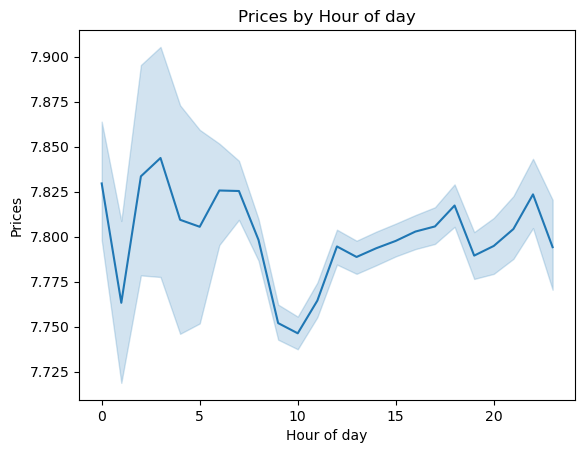

In [49]:
# Create line chart
line_prices_hours = sns.lineplot(data = prices_hours, x = 'order_hour_of_day',y = 'prices')
plt.xlabel('Hour of day')
plt.ylabel('Prices')  
plt.title('Prices by Hour of day')

Prices don't fluctuate significantly through the day.

In [51]:
# Export image file
line_prices_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hours.png'))

## 'age' & 'number_children' Line Chart

In [54]:
# Create new df with only necessary columns
age_children = small_2[['age','number_children']]

Text(0.5, 1.0, 'Relationship Between Customer Age and Number of Children')

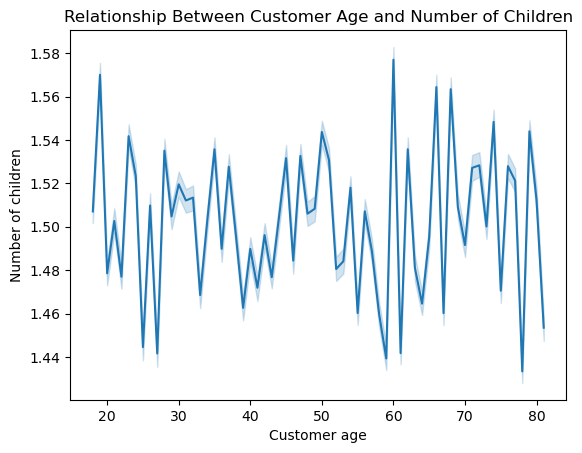

In [56]:
# Create line chart
line_age_children = sns.lineplot(data = age_children, x = 'age',y = 'number_children')
plt.xlabel('Customer age')
plt.ylabel('Number of children')  
plt.title('Relationship Between Customer Age and Number of Children')

No clear correlation between two columns. 

In [57]:
# Export image file
line_age_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_children.png'))

## 'age' & 'income' Scatterplot

In [58]:
# Create new df with only necessary columns
age_income = small_2[['age','income']]

Text(0.5, 1.0, 'Relationship Between Customer Age and Income')

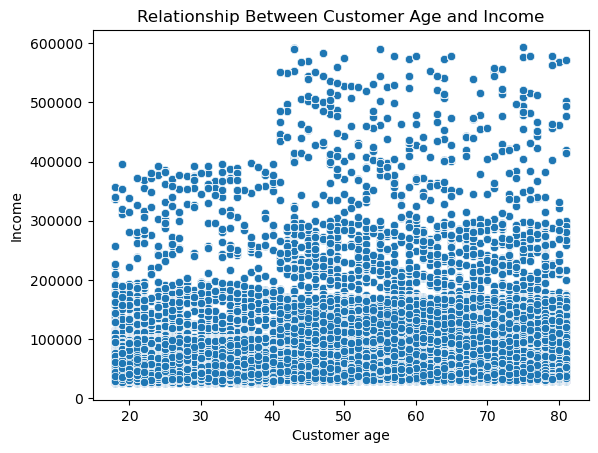

In [65]:
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = age_income)
plt.xlabel('Customer age')
plt.ylabel('Income')  
plt.title('Relationship Between Customer Age and Income')

For a small portion of customers, income generally increases at age 40. 

In [67]:
# Export image file
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))